### Histogram equalization only to the foreground of an image

#### Open the image

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
Jeniffer_image = cv.imread("E:/GitHub_Projects/Intensity-Transformations-and-Neighborhood-Filtering/a1images/jeniffer.jpg")
assert Jeniffer_image is not None, "Image not found."

#### Split it into hue, saturation, and values

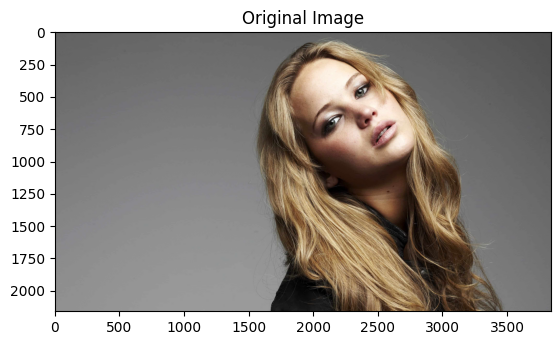

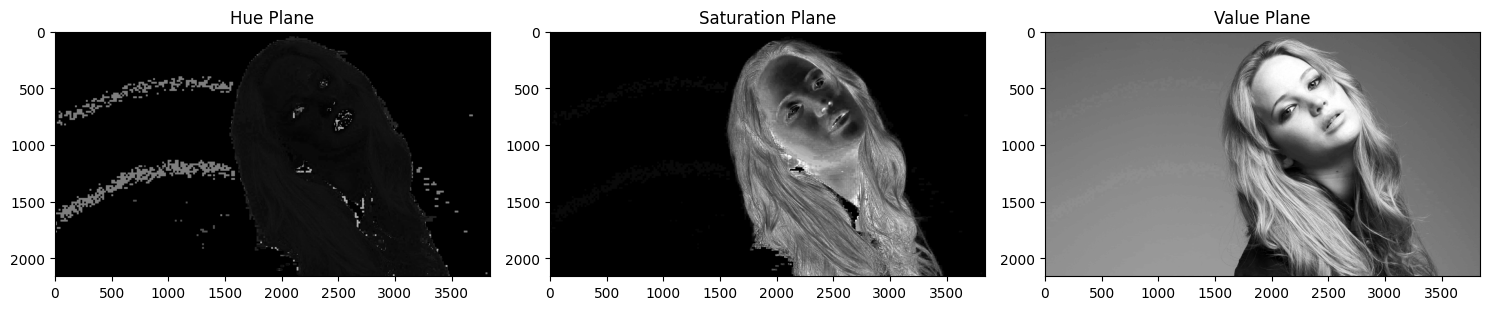

In [15]:
# Convert BGR image to RGB for visualization
plt.imshow(cv.cvtColor(Jeniffer_image, cv.COLOR_BGR2RGB))
plt.title("Original Image")

# Convert image from BGR to HSV
Jeniffer_hsv_image = cv.cvtColor(Jeniffer_image, cv.COLOR_BGR2HSV)

# Extract the individual Hue, Saturation, and Value channels
Jeniffer_hue_plane = Jeniffer_hsv_image[:, :, 0]
Jeniffer_saturation_plane = Jeniffer_hsv_image[:, :, 1]
Jeniffer_value_plane = Jeniffer_hsv_image[:, :, 2]

# Display the three channels separately
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(Jeniffer_hue_plane, cmap="gray",vmin=0, vmax=255)
axes[0].set_title("Hue Plane")

axes[1].imshow(Jeniffer_saturation_plane, cmap="gray",vmin=0, vmax=255)
axes[1].set_title("Saturation Plane")

axes[2].imshow(Jeniffer_value_plane, cmap="gray",vmin=0, vmax=255)
axes[2].set_title("Value Plane")

plt.tight_layout()
plt.show()


#### Select the appropriate plane to threshold in extract the foreground mask. 

In [ ]:
Jeniffer_saturation_plane.max()

#### Obtaining the foreground only and compute the histogram.

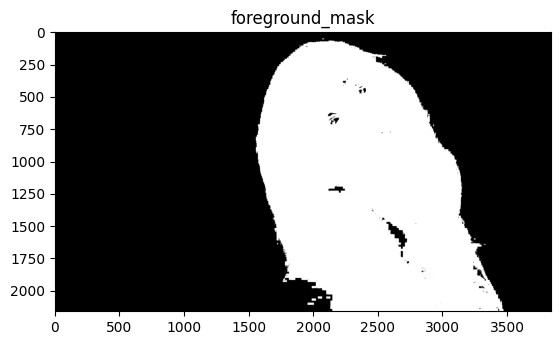

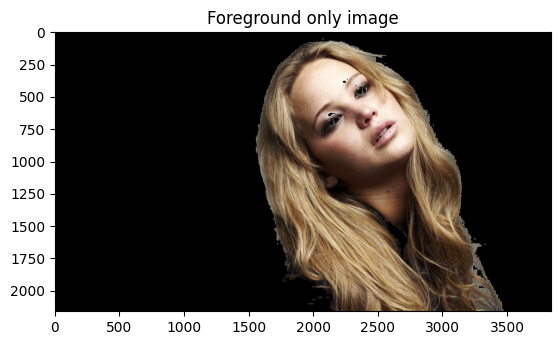

In [25]:
# Foreground mask for the image
foreground_mask = Jeniffer_saturation_plane >15
plt.title("foreground_mask")
plt.imshow(foreground_mask, cmap='gray')
plt.show()
# Get the foreground only from the image
Extracted_foreground = cv.bitwise_and(Jeniffer_image, Jeniffer_image, mask=foreground_mask.astype(np.uint8));

# Display the foreground only image
plt.title("Foreground only image")
plt.imshow(cv.cvtColor(Extracted_foreground, cv.COLOR_BGR2RGB))

# Display the foreground mask
plt.show()


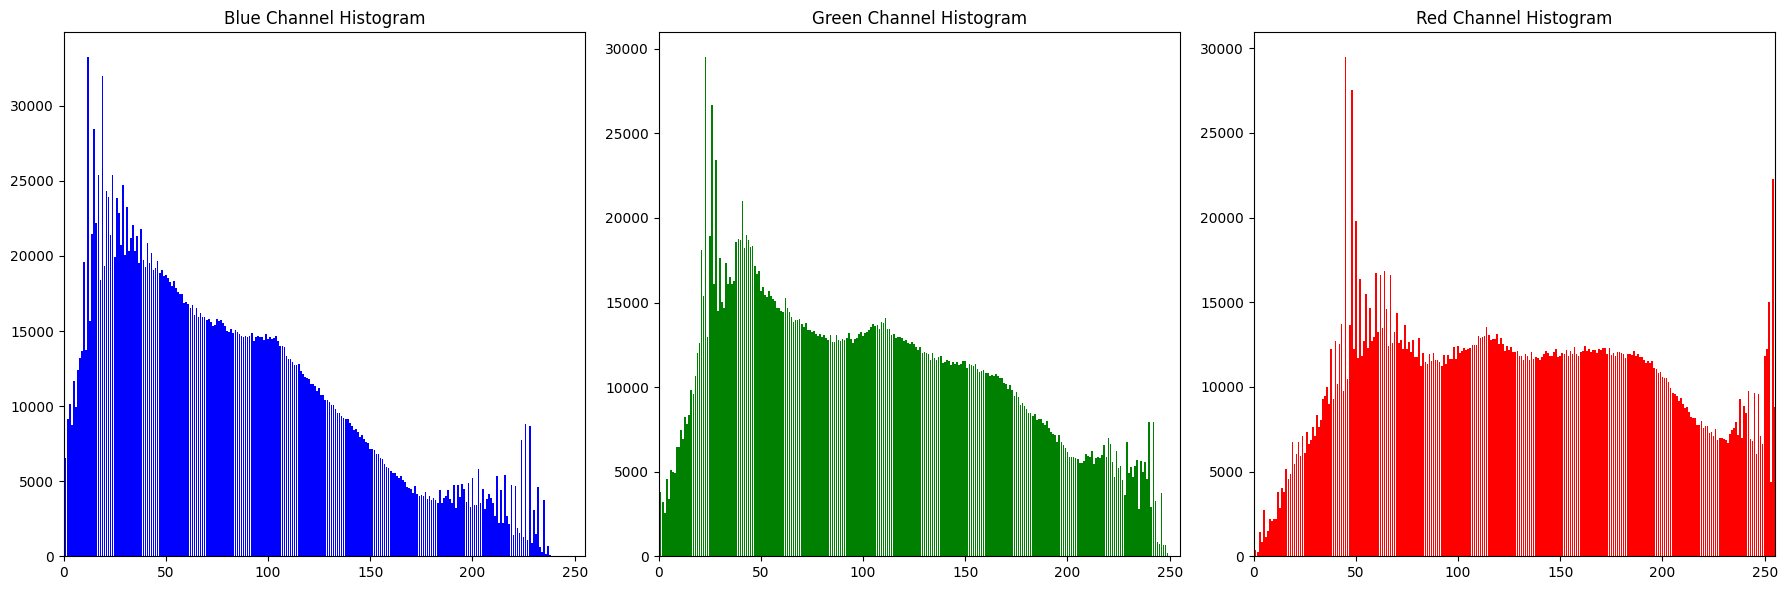

In [27]:
# Compute the histogram for each color channel (B, G, R)
def compute_histogram(image, mask=None):
    # Calculate histograms for each channel separately
    hist_b = cv.calcHist([image], [0], mask, [256], [0, 256])
    hist_g = cv.calcHist([image], [1], mask, [256], [0, 256])
    hist_r = cv.calcHist([image], [2], mask, [256], [0, 256])
    return hist_b, hist_g, hist_r

# Compute the histograms for the foreground only
hist_b, hist_g, hist_r = compute_histogram(Extracted_foreground, foreground_mask.astype(np.uint8))

# Plot the original histograms for each channel
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.bar(np.arange(256), hist_b.ravel(), color='blue')
plt.title('Blue Channel Histogram')
plt.xlim([0, 255])

plt.subplot(1, 3, 2)
plt.bar(np.arange(256), hist_g.ravel(), color='green')
plt.title('Green Channel Histogram')
plt.xlim([0, 255])

plt.subplot(1, 3, 3)
plt.bar(np.arange(256), hist_r.ravel(), color='red')
plt.title('Red Channel Histogram')
plt.xlim([0, 255])

plt.tight_layout()
plt.show()



#### Cumulative sum of the histogram using np.cumsum.

In [41]:
# Use the foreground mask on the Value plane
jeniffer_foreground_value = cv.bitwise_and(Jeniffer_value_plane, Jeniffer_value_plane, mask=foreground_mask.astype(np.uint8))

# Compute the histogram and cumulative histogram for the Value plane
hist_v = cv.calcHist([jeniffer_foreground_value], [0], foreground_mask.astype(np.uint8), [256], [0, 256])
cum_hist_v = np.cumsum(hist_v)

#### Histogram-equalize the foreground.

In [44]:
# Get the pixel count for normalization
pixel_count = foreground_mask.astype(np.uint8).sum()

# Create a lookup table using the cumulative histogram to equalize the Value plane
def equalize_histogram(cum_hist, pixel_count):
    return ((cum_hist / pixel_count) * 255).astype(np.uint8)
lut_v = equalize_histogram(cum_hist_v, pixel_count)

# Apply the equalization lookup table to the Value plane
jeniffer_equalized_foreground_value = cv.LUT(jeniffer_foreground_value, lut_v)

# Merge the equalized Value plane with the original Hue and Saturation planes
jeniffer_equalized_foreground_hsv_img = cv.merge((Jeniffer_hue_plane, Jeniffer_saturation_plane, jeniffer_equalized_foreground_value))

# Convert the equalized HSV image back to BGR color space
jeniffer_equalized_foreground_bgr_img = cv.cvtColor(jeniffer_equalized_foreground_hsv_img, cv.COLOR_HSV2BGR)

#### Extract the background and add with the histogram equalized foreground

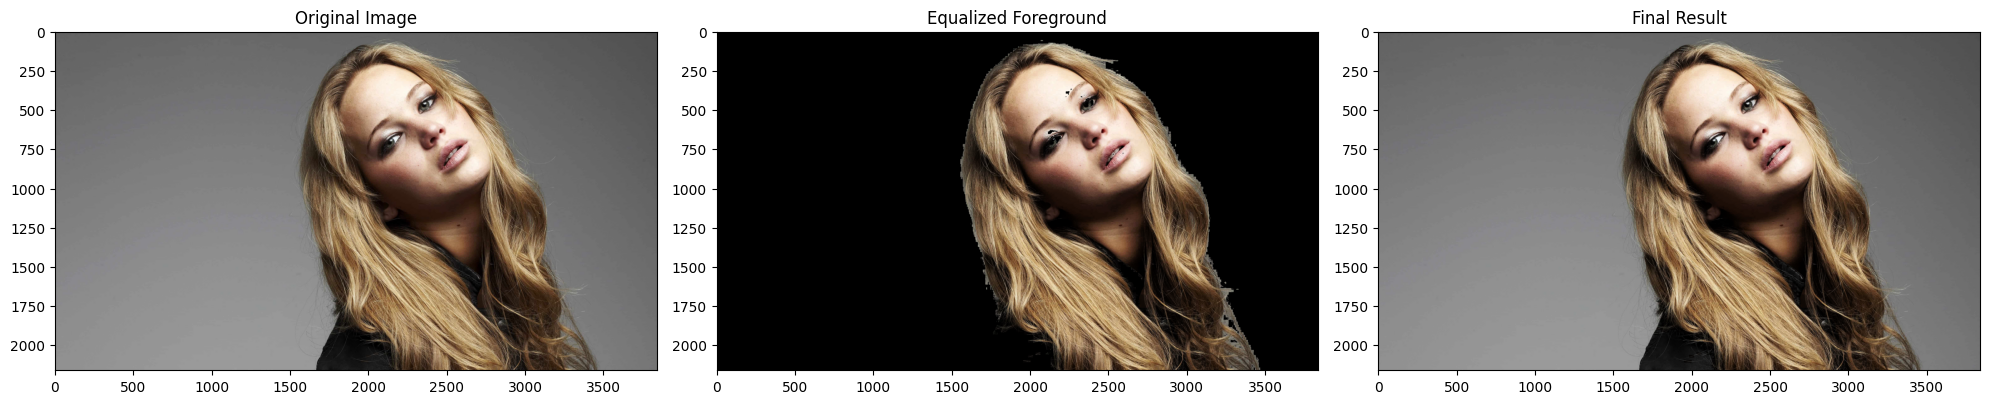

In [45]:
# Extract the background from the original image
jeniffer_background_bgr = Jeniffer_image-Extracted_foreground

# Combine the equalized foreground with the original background
jeniffer_result = cv.add(jeniffer_equalized_foreground_bgr_img, jeniffer_background_bgr)

# Display the results
plt.figure(figsize=(20, 10))

plt.subplot(231)
plt.imshow(cv.cvtColor(Jeniffer_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(232)
plt.imshow(cv.cvtColor(jeniffer_equalized_foreground_bgr_img, cv.COLOR_BGR2RGB))
plt.title('Equalized Foreground')

plt.subplot(233)
plt.imshow(cv.cvtColor(jeniffer_result, cv.COLOR_BGR2RGB))
plt.title('Final Result')

plt.tight_layout()
plt.show()

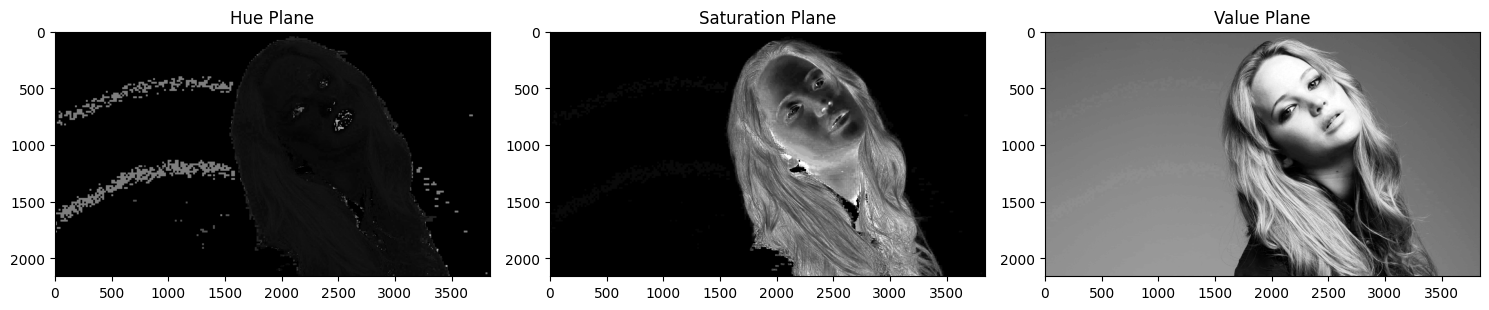

In [46]:
# Convert image from BGR to HSV
Jenifferf_hsv_image = cv.cvtColor(jeniffer_result, cv.COLOR_BGR2HSV)

# Extract the individual Hue, Saturation, and Value channels
Jenifferf_hue_plane = Jenifferf_hsv_image[:, :, 0]
Jenifferf_saturation_plane = Jenifferf_hsv_image[:, :, 1]
Jenifferf_value_plane = Jenifferf_hsv_image[:, :, 2]

# Display the three channels separately
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(Jenifferf_hue_plane, cmap="gray",vmin=0, vmax=255)
axes[0].set_title("Hue Plane")

axes[1].imshow(Jenifferf_saturation_plane, cmap="gray",vmin=0, vmax=255)
axes[1].set_title("Saturation Plane")

axes[2].imshow(Jenifferf_value_plane, cmap="gray",vmin=0, vmax=255)
axes[2].set_title("Value Plane")

plt.tight_layout()
plt.show()